# Machine Learning - Final Project
## Accident Severity Prediction
**Team**: *Jennifer Lord, Konstantinos Georgiou, Russ Limber, Sanjeev Singh, Sara Howard*

## Where to put the code
- Place the preprocessing functions/classes in [\<project root\>/project_libs/project/preprocessing.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/preprocessing.py)
- The models in [\<project root\>/project_libs/project/models.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/models.py)
- Any plotting related functions in [\<project root\>/project_libs/project/plotter.py](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/project_libs/project/plotter.py)


**The code is reloaded automatically. Any class object needs to reinitialized though.** 

## Config file
The yml/config file is located at: [confs/prototype1.yml](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/blob/master/confs/prototype1.yml)<br>
To load it run:
```python
config_path='confs/prototype1.yml'
conf = Configuration(config_src=config_path)
# Get the dataset loader config
loader_config = conf.get_config('data_loader')['config']['dataset'] # type = Dict
print(books.keys())
print(loader_config['url'])
```
To reload the config just run the 2nd and 3rd command.

## Libraries Overview:
All the libraries are located under *"\<project root>/project_libs"*
- project_libs/**project**: This project's code (imported later)
- project_libs/**configuration**: Class that creates config objects from yml files
- project_libs/**fancy_logger**: Logger that can be used instead of prints for text formatting (color, bold, underline etc)

## For more info check out:
- the **[Project Board](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/projects/1)**
- and the **[Current Issues](https://github.com/UTK-ML-Dream-Team/accident-severity-prediction/issues)**

# ------------------------------------------------------------------

## On Google Collab?
- **If yes, run the two cells and press the two buttons below:**
- Otherwise go to "***Import the base Libraries***"

In [1]:
# Import Jupyter Widgets
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# Clone the repository if you're in Google Collab
def clone_project(is_collab: bool = False):
    print("Cloning Project..")
    !git clone https://github.com/UTK-ML-Dream-Team/accident-severity-prediction.git
    print("Project cloned.")
       
print("Clone project?")
print("(If you do this you will ovewrite local changes on other files e.g. configs)")
print("Not needed if you're not on Google Collab")
btn = widgets.Button(description="Yes, clone")
btn.on_click(clone_project)
display(btn)

Clone project?
(If you do this you will ovewrite local changes on other files e.g. configs)
Not needed if you're not on Google Collab


Button(description='Yes, clone', style=ButtonStyle())

In [2]:
# Clone the repository if you're in Google Collab
def change_dir(is_collab: bool = False):
    try:
        print("Changing dir..")
        os.chdir('/content/accident-severity-prediction')
        print('done')
        print("Current dir:")
        print(os.getcwd())
        !git checkout kostas
        print("Dir Contents:")
        print(os.listdir())
        print("\nInstalling Requirements")
        !pip install -r requirements.txt
    except Exception:
        print("Error: Project not cloned")
       
print("Are you on Google Collab?")
btn = widgets.Button(description="Yes")
btn.on_click(change_dir)
display(btn)

Are you on Google Collab?


Button(description='Yes', style=ButtonStyle())

### To commit and push Google Collab notebook to Github
Click **File > Save a copy on Gihtub**

# ------------------------------------------------------------------

# Initializations

## Import the base Libraries

In [3]:
# Imports
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats = ['png']
from importlib import reload as reload_lib
from typing import *
import os
import re
from pprint import pprint
import datetime 
import time
from tqdm.notebook import tqdm as tqdm_nb
from tqdm import tqdm
# Numpy
import numpy as np
import pandas as pd
# Import preprocessing lib
from project_libs.project import *

## Load the YML file

In [4]:
from project_libs import Configuration

In [5]:
# The path of configuration and log save path
config_path = "confs/prototype1.yml"
# !cat "$config_path"
# Load the configuratåion
conf = Configuration(config_src=config_path)
# Get the books dict
loader_config = conf.get_config('data_loader')['config']['dataset']
preprocessing_config = conf.get_config('data_loader')['config']['preprocessing']
# print(books.keys())
# pprint(books)  # Pretty print the books dict

2021-12-07 00:02:22 Config       INFO     Configuration file loaded successfully from path: /Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-prediction/confs/prototype1.yml
2021-12-07 00:02:22 Config       INFO     Configuration Tag: prototype_1


# ------------------------------------------------------------------

# Start of Project Code

In [6]:
from project_libs import project as proj

## Data Loading

In [7]:
# Download Dataset again if requested
!python -V
should_download = loader_config['download']
if should_download:
    kaggle_dataset_name = loader_config['kaggle_dataset_name']
    !pip install "kaggle>=1.5.12"
    !mkdir ~/.kaggle
    !cp confs/kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    !mkdir data
    !cd data && kaggle datasets download -d $kaggle_dataset_name && unzip -o us-accidents.zip && rm us-accidents.zip

Python 3.8.12
mkdir: /Users/gkos/.kaggle: File exists
mkdir: data: File exists
100%|████████████████████████████████████████| 117M/117M [01:33<00:00, 1.27MB/s]
100%|████████████████████████████████████████| 117M/117M [01:33<00:00, 1.32MB/s]
Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20_updated.csv  


In [8]:
# Load Dataset
accidents_df_original = pd.read_csv(loader_config['local_dataset_name'])
accidents_df = accidents_df_original.copy()


## Exploration

### Sampling Tests

In [9]:
# Print Basic Info
print(f"Number of rows: {accidents_df.shape[0]}")
print(f"Number of Columns: {accidents_df.shape[1]}")
print(f"Columns: {accidents_df.columns}")

Number of rows: 1516064
Number of Columns: 47
Columns: Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [10]:
# -- Filter By Cities -- #
print("Unique Cities: ")
cities = accidents_df.City.unique().tolist()
print(f"{cities[:10]}, ..")
print(f"Number of cities: {len(cities)}")
print("----------------------------------------------------")

# Try different number of cities filters
for num_cities in [20, 50, 100, 500, 1000, 1500, 2000]:
    current_num = accidents_df[accidents_df.City.isin(cities[:num_cities])].shape[0]
    print(f"Number of rows when only FIRST {num_cities} were included: {current_num}")

Unique Cities: 
['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg', 'Batavia', 'Cleveland', 'Lima', 'Westerville', 'Jamestown'], ..
Number of cities: 10658
----------------------------------------------------
Number of rows when only FIRST 20 were included: 28208
Number of rows when only FIRST 50 were included: 49824
Number of rows when only FIRST 100 were included: 62172
Number of rows when only FIRST 500 were included: 279012
Number of rows when only FIRST 1000 were included: 693738
Number of rows when only FIRST 1500 were included: 775703
Number of rows when only FIRST 2000 were included: 1037886


In [11]:
# -- Filter By Date -- #
accidents_df.loc[:, 'Start_Time_dt'] = pd.to_datetime(accidents_df.Start_Time)
print(f"Earliest date: {accidents_df.Start_Time_dt.min()}")
print(f"Most Recent date: {accidents_df.Start_Time_dt.max()}")
print("----------------------------------------------------")

# Try different date filters
dates = [(2017, 1), (2018, 1), (2019, 1), (2020, 1), (2020, 6), (2020, 9)]
for year, month in dates:
    condition = accidents_df.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
    current_num = accidents_df.Start_Time_dt[condition].shape[0]
    print(f"Number of rows when only dates STARTED FROM {month}/{year} were included: {current_num}")


Earliest date: 2016-02-08 00:37:08
Most Recent date: 2020-12-31 23:28:56
----------------------------------------------------
Number of rows when only dates STARTED FROM 1/2017 were included: 1386739
Number of rows when only dates STARTED FROM 1/2018 were included: 1216640
Number of rows when only dates STARTED FROM 1/2019 were included: 1049704
Number of rows when only dates STARTED FROM 1/2020 were included: 787932
Number of rows when only dates STARTED FROM 6/2020 were included: 546313
Number of rows when only dates STARTED FROM 9/2020 were included: 480503


In [12]:
# -- Filter By States and Date -- #
print("Unique States: ")
states = accidents_df.State.unique().tolist()
print(states[:10])
print(f"Number of states: {len(states)}")
print("----------------------------------------------------")

# Filter By NE States
staes_of_choice =  ['PA', 'NY', 'VY', 'ME', 'NH', 'MA', 'RI', 'CT', 'NJ', 'DE', 'DC', 'MD']
accidents_df_filtered = accidents_df[accidents_df.State.isin(staes_of_choice)].copy()
print(f"Number of rows when only North Eastern states were included: {accidents_df_filtered.shape[0]}")

# By Date
year, month = 2020, 1
condition = accidents_df_filtered.Start_Time_dt.dt.date>=datetime.date(year=year,month=month,day=1)
current_num = accidents_df_filtered.Start_Time_dt[condition].shape[0]
print(f"Number of rows when only dates STARTED FROM {month}/{year} for the North Easter States were included: {current_num}")

Unique States: 
['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX']
Number of states: 49
----------------------------------------------------
Number of rows when only North Eastern states were included: 206216
Number of rows when only dates STARTED FROM 1/2020 for the North Easter States were included: 114565


### Correlation between features

In [13]:
from project_libs.project import plotter as pl

['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


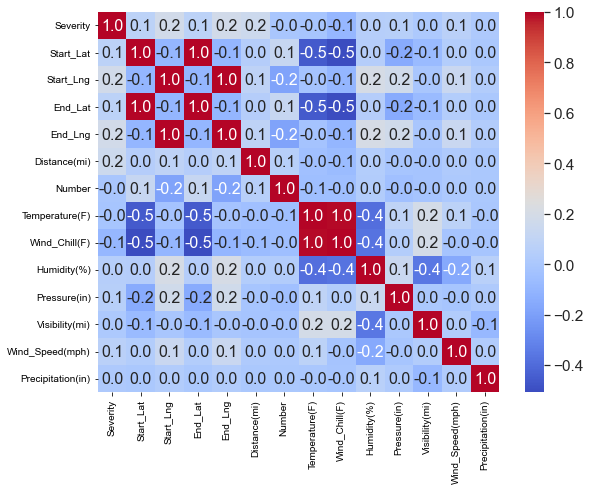

In [14]:
# Find Correlations between columns
cols_to_visualize = list(accidents_df_original.describe().columns)
print(cols_to_visualize)
pl.viz_columns_corr(accidents_df_original, cols_to_visualize)

## Preprocessing

In [15]:
from project_libs.project import preprocessing as pre

In [16]:
# Create a copy of the df
accidents_df_isolated = accidents_df_original.copy()

# Isolate city state
city_list = preprocessing_config['city_list']
state_list = preprocessing_config['state_list']
accidents_df_isolated = pre.isolate_city_state(accidents_df_isolated, city_list, state_list)
display(accidents_df_isolated)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
98138,A-2814738,3,2016-11-30 15:01:56,2016-11-30 21:01:56,33.662770,-111.999580,33.66622,-111.99952,0.238,At AZ-101-LOOP/Exit 15 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98139,A-2814739,2,2016-11-30 15:19:52,2016-11-30 21:19:52,33.668760,-112.072750,33.66898,-112.05849,0.820,At 7th St/Exit 26 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98141,A-2814741,2,2016-11-30 17:05:39,2016-11-30 23:05:39,33.484250,-112.113190,33.47491,-112.11320,0.645,At Thomas Rd/Exit 201 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98142,A-2814742,2,2016-11-30 17:10:37,2016-11-30 23:10:37,33.295215,-111.972420,33.28853,-111.97132,0.466,At Chandler Blvd/Exit 160 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
98146,A-2814746,2,2016-11-30 18:28:58,2016-12-01 00:28:58,33.461900,-112.092145,33.46190,-112.09904,0.397,At 19th Ave/Exit 143C - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515761,A-4239104,3,2019-08-23 16:58:31,2019-08-23 17:26:11,41.815300,-87.630480,41.81212,-87.63042,0.220,At 47th St/Exit 56B - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1515762,A-4239105,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.715130,-87.630040,41.71499,-87.63090,0.045,At I-57/Exit 63 - Accident. unconfirmed report.,...,False,False,False,False,False,False,Day,Day,Day,Day
1515763,A-4239106,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.943350,-87.716690,41.94859,-87.72162,0.442,At Addison St/Exit 45A - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1515764,A-4239107,3,2019-08-23 16:03:57,2019-08-23 16:33:31,41.718620,-87.625210,41.71513,-87.63004,0.347,Ramp to I-57 Southbound - Accident. unconfirme...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [17]:
### --- Russ's Code --- ###

# Create a copy of the df
accidents_df_russ = accidents_df_isolated.copy()

env_vars = preprocessing_config['env_vars']
accidents_df_russ = pre.subset_df(accidents_df_russ, env_vars)

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))

temp_wind = pre.subset_df(accidents_df_russ, ['Temperature(F)', 'Wind_Speed(mph)'])
pre.OLS(temp_wind, np.array(accidents_df_russ['Wind_Chill(F)']))

accidents_df_russ["Wind_Temp"] = accidents_df_russ['Wind_Chill(F)'].fillna((accidents_df_russ['Temperature(F)']*1.0178 - accidents_df_russ['Wind_Speed(mph)']*0.3023))

print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))
accidents_df_russ.drop("Wind_Chill(F)", axis=1)

accidents_df_russ = pre.knn_imputer(accidents_df_russ, 3)
accidents_df_russ = pre.basic_impute(accidents_df_russ)

#print('Percent of missing rows by column', '\n\n', accidents_df_russ.isnull().sum()/len(accidents_df_russ))


2021-12-07 00:04:18 Preprocessing INFO                                      OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.042e+07
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                        00:04:18   Log-Likelihood:                     -1.2984e+05
No. Observations:               56661   AIC:                                  2.597e+05
Df Residuals:                   56659   BIC:                                  2.597e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      

Percent of missing rows by column 

 Weather_Timestamp        0.007985
Temperature(F)           0.010175
Wind_Chill(F)            0.373365
Humidity(%)              0.010639
Pressure(in)             0.010352
Visibility(mi)           0.009920
Wind_Direction           0.017584
Wind_Speed(mph)          0.103427
Precipitation(in)        0.376229
Weather_Condition        0.009721
Sunrise_Sunset           0.000000
Civil_Twilight           0.000000
Nautical_Twilight        0.000000
Astronomical_Twilight    0.000000
dtype: float64
Percent of missing rows by column 

 Weather_Timestamp        0.007985
Temperature(F)           0.010175
Wind_Chill(F)            0.373365
Humidity(%)              0.010639
Pressure(in)             0.010352
Visibility(mi)           0.009920
Wind_Direction           0.017584
Wind_Speed(mph)          0.103427
Precipitation(in)        0.376229
Weather_Condition        0.009721
Sunrise_Sunset           0.000000
Civil_Twilight           0.000000
Nautical_Twilight        0.

In [18]:
### --- Sanjeev's Code --- ###

# Create a copy of the df
accidents_df_sanjeev = accidents_df_isolated.copy()

# Filter the infra variables
infra_vars = preprocessing_config['infra_vars']
accidents_df_infra = accidents_df_isolated[infra_vars].copy()

# Filter location and basic variables
accidents_df_sanjeev = pre.filter_loc_basic_var(accidents_df_sanjeev)

# Combine all Russ, Sanjeev, and Infra DF
X_raw = pd.concat([accidents_df_russ, accidents_df_sanjeev, accidents_df_infra], axis=1)
print('X_raw: Number of missing rows by column', '\n', X_raw.isnull().sum())

# Standardize, Encode, Extract and Split Train/Test
X_train, X_val, X_test, y_train, y_val, y_test = encode_std_extract_split(X_raw)

X_raw: Number of missing rows by column 
 Weather_Timestamp          722
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction            1590
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition          879
Sunrise_Sunset               0
Civil_Twilight               0
Nautical_Twilight            0
Astronomical_Twilight        0
Wind_Temp                    0
ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Distance(mi)                 0
Description                  0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Number                   67960
Street                       0
Side                         0
City                         0
County                       0
State                       




### PCA

In [19]:
### --- Kostas's Code --- ###

# Create a copy of the dfs
X_train_PCA = X_train.copy()
X_val_PCA = X_val.copy()
X_test_PCA = X_test.copy()

# Retrieve Numerical Columns
numerical_cols = X_train_PCA.describe().columns
print("Number of columns to reduce using PCA (only numerical ones): ", len(numerical_cols))

# Check for Nulls
print("\nNull values per column:")
print(X_train_PCA[numerical_cols].isna().sum())

# Export to Numpy
X_train_PCA_np = X_train_PCA[numerical_cols].to_numpy()
X_val_PCA_np = X_val_PCA[numerical_cols].to_numpy()
X_test_PCA_np = X_test_PCA[numerical_cols].to_numpy()
print("\nType of exported Numpy array: ", X_train_PCA_np.dtype)

# Run PCA
pca = pre.PCA()
pca.fit(data=X_train_PCA_np, max_error=0.01)
X_train_PCA_np = pca.transform(data=X_train_PCA_np)
X_val_PCA_np = pca.transform(data=X_val_PCA_np)
X_test_PCA_np = pca.transform(data=X_test_PCA_np)

# Drop the reduces columns from DF
X_train_PCA = X_train_PCA.drop(numerical_cols, axis=1)
X_val_PCA = X_val_PCA.drop(numerical_cols, axis=1)
X_test_PCA = X_test_PCA.drop(numerical_cols, axis=1)

# Add the new (reduced) columns to the Dataframe
num_new_cols = X_train_PCA_np.shape[1]
new_col_names = [f"PCA_{ind}" for ind in range(num_new_cols)]
X_train_PCA[new_col_names] = X_train_PCA_np
X_val_PCA[new_col_names] = X_val_PCA_np
X_test_PCA[new_col_names] = X_test_PCA_np

# Print New columns
print("\nNumber of columns (after PCA): ", len(X_train_PCA.describe().columns))
print("\nColumns: ", X_train_PCA.columns)

Number of columns to reduce using PCA (only numerical ones):  142

Null values per column:
Temperature(F)                              0
Wind_Chill(F)                               0
Humidity(%)                                 0
Pressure(in)                                0
Visibility(mi)                              0
                                           ..
Weather_Condition_Thunderstorm              0
Weather_Condition_Thunderstorms and Rain    0
Weather_Condition_Widespread Dust           0
Weather_Condition_Wintry Mix                0
Weather_Condition_Wintry Mix / Windy        0
Length: 142, dtype: int64

Type of exported Numpy array:  float64


2021-12-07 00:07:10 Preprocessing INFO     For # dims=15 error=0.009648036067527399 <= 0.01



Number of columns (after PCA):  16

Columns:  Index(['PCA_0', 'PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7',
       'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12', 'PCA_13', 'PCA_14',
       'PCA_15'],
      dtype='object')


## Prepare Models

In [20]:
from project_libs.project import models

In [21]:
# Export to Numpy
# Train set PCA and non-PCA
X_train_PCA_np = X_train_PCA.to_numpy()
X_train_PCA_TVT = X_train_PCA.loc[:, X_train_PCA.columns!='PCA_15'].copy().reset_index(drop=True)
X_train_PCA_TVT_np = X_train_PCA_TVT.to_numpy()
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
y_train_onehot_np = pre.one_hot_encode(y_train_np)
# Test set PCA and non-PCA
X_test_PCA_np = X_test_PCA.to_numpy()
X_test_PCA_TVT = X_test_PCA.loc[:, X_test_PCA.columns!='PCA_15'].copy().reset_index(drop=True)
X_test_PCA_TVT_np = X_test_PCA_TVT.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()
y_test_onehot_np = pre.one_hot_encode(y_test_np)
# Validation set PCA and non-PCA
X_val_PCA_np = X_val_PCA.to_numpy()
X_val_PCA_TVT = X_val_PCA.loc[:, X_val_PCA.columns!='PCA_15'].copy().reset_index(drop=True)
X_val_PCA_TVT_np = X_val_PCA_TVT.to_numpy()
X_val_np = X_val.to_numpy()
y_val_np = y_val.to_numpy()
y_val_onehot_np = pre.one_hot_encode(y_val_np)
# Unique classes
num_classes = np.unique(y_train_np).astype(int).shape[0]

## Hyperparameter Tuning

### 1. Tune KMeans

In [ ]:
distances = ['cityblock', 'correlation', 'cosine','euclidean']

# Prepare Training Data
X_train_PCA_TVT = X_train_PCA.loc[:, X_train_PCA.columns!='PCA_15'].copy()
X_train_PCA_TVT.reset_index(drop=True)
X_train_PCA_TVT = X_train_PCA_TVT.to_numpy()

# Prepare Validation Data
X_val_PCA_TVT = X_val_PCA.loc[:, X_val_PCA.columns!='PCA_15'].copy()
X_val_PCA_TVT.reset_index(drop=True)
X_val_PCA_TVT = X_val_PCA_TVT.to_numpy()

print("======================================")
print(f"\033[1mKMeans Tuning Results \033[0m")
print("======================================")
# Compute overall accuracy on validation dataset
for d in distances:
    km = models.kmeans(X_train_PCA_TVT, dist=d)
    km.fit()
    y_pred = km.predict(X_val_PCA_TVT, y_val)
    score = models.accuracy_score(y_pred, y_val)
    print(f"Distance Function: {d} \t Overall Accuracy: {round(100*score, 2)} %")
    
# Cosine is giving the highest overall accuracy

### 2. Tune SVM

In [ ]:
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'gamma':['NA']}]

print("======================================")
print(f"\033[1mSVM Tuning Results \033[0m")
print("======================================")
for param in parameters:
    for k in param['kernel']:
        for g in param['gamma']:
            for c in param['C']:
                if g != 'NA':
                    clf = models.SVC(C=c, kernel=k, gamma=g)
                else:
                    clf = models.SVC(C=c, kernel=k)
                    
                clf.fit(X_train_PCA_TVT, y_train)
                y_pred = clf.predict(X_val_PCA_TVT)
                score = models.accuracy_score(y_pred, y_val)
                f1_s = models.f1_score(y_true, y_val)
                print(f"Kernel: {k} \t Gamma: {g} \t C: {c} \t Accuracy: {round(100*score, 2)}% F1 Score: {f1_s}")
                
"""
Kernel: rbf 	 Gamma: 0.001 	 C: 1      Accuracy: 81.49 *
Kernel: rbf 	 Gamma: 0.001 	 C: 10     Accuracy: 81.61 *
Kernel: rbf 	 Gamma: 0.001 	 C: 100    Accuracy: 81.70 *
Kernel: rbf 	 Gamma: 0.001 	 C: 1000   Accuracy: 82.16 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 1      Accuracy: 81.51 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 10     Accuracy: 81.51 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 100    Accuracy: 81.56 *
Kernel: rbf 	 Gamma: 0.0001 	 C: 1000   Accuracy: 81.62 *
"""

## Need to update results for Linear kernel which is taking a lot of time

### 3. Tune Bayesian

In [ ]:
# Construct Hyperparameters
create_priors = lambda priors: (priors/priors.sum()).tolist()
priors_list = [create_priors(np.random.uniform(0, 1, num_classes)) for _ in range(100)]
cases = ( 
         "mahalanobis", 
         "quadratic",
         "euclidean")
data = (
        ("non-PCA val dataset", X_val_np, y_val_np),
        ("PCA val dataset", X_val_PCA_TVT_np, y_val_np),
        )
# Find optimal hyperapameters
results_1 = {}
results_2 = {}
results_3 = {}
for data_name, x_data, y_data in data:
    # Create model
    bayesian_case = models.BayesianCase(train_x=x_data, train_y=y_data, 
                                        test_x=x_data, test_y=y_data)
    bayesian_case.fit()
    priors_iter = tqdm(list(enumerate(priors_list)))
    for ind, priors in priors_iter:
        for i_case, case in enumerate(cases):
            print_name = f"{data_name} - priors({priors[0]:.4f} , {priors[1]:.4f}) - {case}"
            priors_iter.set_description(print_name)
            bayesian_case.predict(mtype=case, priors=priors)
            accuracy, classwise_accuracy, prediction_time = bayesian_case.get_statistics(case)
            tp, fn, fp, tn = bayesian_case.get_confusion_matrix(case)
            if i_case == 0:
                results_1[print_name] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
            elif i_case == 1:
                results_2[print_name] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
            elif i_case == 2:
                results_3[print_name] = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)

print(f"Tested {len(data)*len(priors_list)*len(cases)} hyperparameters.")

non-PCA val dataset - priors(0.1019 , 0.8981) - quadratic:   0%|          | 0/100 [02:18<?, ?it/s]  /content/accident-severity-prediction/project_libs/project/models.py:159: RuntimeWarning: invalid value encountered in log
  
non-PCA val dataset - priors(0.1019 , 0.8981) - quadratic:   0%|          | 0/100 [02:18<?, ?it/s]


ValueError: ignored

In [ ]:
for ind, data in enumerate(sorted(results_1.items(), key=lambda items: items[1][0], reverse=True)[:3]):
    print(f"Case 1 - Top {ind+1}: {data[0]}")
    print(f"    Accuracy: {data[1][0]:.4f}, \
          Classwise Accs: ({data[1][1][0]:.4f} , {data[1][1][1]:.4f})")
    print()
for ind, data in enumerate(sorted(results_2.items(), key=lambda items: items[1][0], reverse=True)[:3]):
    print(f"Case 2 - Top {ind+1}: {data[0]}")
    print(f"    Accuracy: {data[1][0]:.4f}, \
          Classwise Accs: ({data[1][1][0]:.4f} , {data[1][1][1]:.4f})")
    print()
for ind, data in enumerate(sorted(results_3.items(), key=lambda items: items[1][0], reverse=True)[:3]):
    print(f"Case 3 - Top {ind+1}: {data[0]}")
    print(f"    Accuracy: {data[1][0]:.4f}, \
          Classwise Accs: ({data[1][1][0]:.4f} , {data[1][1][1]:.4f})")
    print()

_res = \
"""
Case 1 - Top 1: PCA val dataset - priors(0.9848 , 0.0152) - euclidean
    Accuracy: 0.7768,           Classwise Accs: (0.9739 , 0.1156)

Case 1 - Top 2: non-PCA val dataset - priors(0.9848 , 0.0152) - euclidean
    Accuracy: 0.7768,           Classwise Accs: (0.9739 , 0.1156)

Case 1 - Top 3: PCA val dataset - priors(0.9924 , 0.0076) - euclidean
    Accuracy: 0.7754,           Classwise Accs: (0.9832 , 0.0780)

Case 2 - Top 1: PCA val dataset - priors(0.7558 , 0.2442) - mahalanobis
    Accuracy: 0.8162,           Classwise Accs: (0.9159 , 0.4817)

Case 2 - Top 2: non-PCA val dataset - priors(0.7558 , 0.2442) - mahalanobis
    Accuracy: 0.8162,           Classwise Accs: (0.9159 , 0.4817)

Case 2 - Top 3: PCA val dataset - priors(0.7470 , 0.2530) - mahalanobis
    Accuracy: 0.8156,           Classwise Accs: (0.9109 , 0.4961)

Case 3 - Top 1: PCA val dataset - priors(0.9924 , 0.0076) - quadratic
    Accuracy: 0.8133,           Classwise Accs: (0.9509 , 0.3516)

Case 3 - Top 2: non-PCA val dataset - priors(0.9924 , 0.0076) - quadratic
    Accuracy: 0.8133,           Classwise Accs: (0.9509 , 0.3516)

Case 3 - Top 3: PCA val dataset - priors(0.9910 , 0.0090) - quadratic
    Accuracy: 0.8132,           Classwise Accs: (0.9488 , 0.3584)
"""

### 4. Tune BPNN

In [22]:
# Calculate the max recommended number of neurons using the formula:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# 𝑁𝑖 = number of input neurons.
# 𝑁𝑜 = number of output neurons.
# 𝑁𝑠 = number of samples in training data set.
# 𝛼 = an arbitrary scaling factor usually 2-10.
Ni = int(X_train_PCA_TVT_np.shape[1] - 1)
No = int(y_train_onehot_np.shape[1])
Ns = X_train_PCA_TVT_np.shape[0]
a = 2
total_num_neurons = Ns/(a*(Ni+No))
logger.info(f"Max recommended number of hidden neurons to use: {total_num_neurons}", 
            color='grey', on_color="on_red")

# Different hidden neuron configurations
print(f"{757+757+757=}")
print(f"{160+1952+160=}")
print(f"{568+568+568+568=}")
print(f"{288+848+848+288=}")

2021-12-07 00:07:10 Models       INFO     Max recommended number of hidden neurons to use: 2260.5


757+757+757=2271
160+1952+160=2272
568+568+568+568=2272
288+848+848+288=2272


In [ ]:
from itertools import product

# Func to create string from list (for creating names)
def join_lst(lst): return '-'.join([str(el) for el in lst])

# Static Hyperparams
loss_functions = ['mse', 'cross_entropy']
symmetric_weights = True
shuffle = True
seed = 3
early_stopping = {"max_accuracy": 0.99, 'wait': 2}
debug = {'epochs': 1, 'batches': 10**10,
         'ff': False, 'bp': False, 'w': False, 'metrics': False}
mlp_models = {}
mlp_accuracies = {}
mlp_losses = {}
mlp_times = {}
# Hyperparams to test
b_size_epochs_loops = (
    (500, 5),
)
reg_loops = (
    0.001,
    0.005,
    0.01,
)
mom_loops = (
    0.0003,
    0.00007,
    0.00012,
)
lr_loops = (
    0.5,
    0.3,
)
lay_act_loops = (
    # ([757, 757, 757], ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    # ([160, 1952, 160], ["sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    # ([568, 568, 568, 568], ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    # ([288, 848, 848, 288], ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
    ([160, 544, 848, 544, 160], ["sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid", "sigmoid"]),
)
# Create product of all combinations of the hyperparameters
params = list(product(lay_act_loops, lr_loops,
              mom_loops, reg_loops, b_size_epochs_loops))
logger.info(f"Number of Hyperparamater combinations to test: {len(params)}")
# Train on validation set and save results
for ind, (lay_act, lr, mom, reg, b_size_epochs) in enumerate(params):
    logger.nl(3)
    logger.info(f"Hyperparam combination {ind+1}/{len(params)}")
    lay, act = lay_act
    b_size, max_epochs = b_size_epochs
    name = f"lay.{join_lst(lay)}__act.{join_lst(act)}__lr.{lr}__b.{b_size}__mom.{mom}__reg.{reg}"
    try:
      mlp_models[name], mlp_accuracies[name], mlp_losses[name], mlp_times[name] = \
          models.train_dataset(name, X_val_PCA_TVT_np.copy(), y_val_onehot_np.copy(), lay, act,
                              loss_functions, lr, mom, b_size, early_stopping,
                              max_epochs, reg, shuffle, symmetric_weights, seed, debug)
    except Exception as e:
      print(e)

2021-12-06 04:43:55 Models       INFO     Number of Hyperparamater combinations to test: 18



2021-12-06 04:43:55 Models       INFO     Hyperparam combination 1/18

2021-12-06 04:43:55 Models       INFO     Training lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.001 dataset..
2021-12-06 04:43:55 Models       INFO     [15, 160, 544, 848, 544, 160, 2]
2021-12-06 04:43:55 Models       INFO     Epoch: 1
2021-12-06 04:46:10 Models       INFO       mse Loss: 0.06151
2021-12-06 04:46:10 Models       INFO       cross_entropy Loss: 0.06262
2021-12-06 04:46:10 Models       INFO       Accuracy: 6986/9042
2021-12-06 04:46:10 Models       INFO     Epoch: 2
2021-12-06 04:48:25 Models       INFO       mse Loss: 0.06222
2021-12-06 04:48:25 Models       INFO       cross_entropy Loss: 0.06357
2021-12-06 04:48:25 Models       INFO       Accuracy: 6968/9042
2021-12-06 04:48:25 Models       INFO     Epoch: 3
2021-12-06 04:50:42 Models       I

In [69]:

mlp_losses = {}
mlp_accuracies = {}

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.001'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.001']['mse']=[0.06151, 0.06222, 0.06291, 0.06364, 0.06436]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.001']['cross_entropy'] = [0.06262, 0.06357, 0.06413, 0.06548, 0.06594]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.001'] = [6986/9042, 6968/9042, 6966/9042, 6966/9042, 6966/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.005'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.005']['mse']=[0.30663, 0.31005, 0.31350, 0.31697, 0.32052]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.005']['cross_entropy'] = [0.30781, 0.31167, 0.31474, 0.31793, 0.32118]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.005'] = [6988/9042, 6968/9042, 6973/9042, 6982/9042, 6988/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.01'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.01']['mse']=[0.61285, 0.61948, 0.62615, 0.63301, 0.63988]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.01']['cross_entropy'] = [0.61400, 0.62014, 0.62640, 0.63424, 0.64110]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.0003__reg.0.01'] = [6986/9042, 6992/9042, 7013/9042, 6977/9042, 6978/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.001'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.001']['mse']=[0.06098, 0.06111, 0.06125, 0.06143, 0.06159]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.001']['cross_entropy'] = [0.06191, 0.06213, 0.06218, 0.06231, 0.06216]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.001'] = [6990/9042, 6983/9042, 6994/9042, 7005/9042, 6982/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.005'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.005']['mse']=[0.30396, 0.30466, 0.30533, 0.30605, 0.30683]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.005']['cross_entropy'] = [0.30489, 0.30529, 0.30561, 0.30630, 0.30738]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.005'] = [6992/9042, 6972/9042, 6975/9042, 6979/9042, 6980/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.01'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.01']['mse']=[0.60751, 0.60877, 0.61002, 0.61123, 0.61253]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.01']['cross_entropy'] = [0.60845, 0.60967, 0.61063, 0.61154, 0.61311]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.7e-05__reg.0.01'] = [6989/9042, 6971/9042, 6986/9042, 7017/9042, 6999/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.001'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.001']['mse']=[0.06110, 0.06137, 0.06162, 0.06192, 0.06220]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.001']['cross_entropy'] = [0.06237, 0.06231, 0.06210, 0.06312, 0.06348]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.001'] = [6990/9042, 6987/9042, 6991/9042, 6972/9042, 6968/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.005'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.005']['mse']=[0.30450, 0.30582, 0.30709, 0.30842, 0.30977]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.005']['cross_entropy'] = [0.30515, 0.30665, 0.30773, 0.30903, 0.31107]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.005'] = [6985/9042, 6994/9042, 6998/9042, 7011/9042, 6976/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.01'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.01']['mse']=[0.60865, 0.61108, 0.61351, 0.61593, 0.61839]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.01']['cross_entropy'] = [0.60935, 0.61210, 0.61456, 0.61668, 0.61908]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.5__b.500__mom.0.00012__reg.0.01'] = [6991/9042, 6969/9042, 6973/9042, 6979/9042, 6971/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.001'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.001']['mse']=[0.06151, 0.06217, 0.06283, 0.06357, 0.06433]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.001']['cross_entropy'] = [0.06238, 0.06253, 0.06304, 0.06384, 0.06472]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.001'] = [6977/9042, 6984/9042, 7008/9042, 7004/9042, 7030/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.005'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.005']['mse']=[0.30666, 0.31011, 0.31362, 0.31715, 0.32072]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.005']['cross_entropy'] = [0.30777, 0.31084, 0.31504, 0.31849, 0.32192]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.005'] = [6980/9042, 6980/9042, 6973/9042, 6976/9042, 6985/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.01'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.01']['mse']=[0.61299, 0.61980, 0.62668, 0.63363, 0.64066]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.01']['cross_entropy'] = [0.61414, 0.62138, 0.62822, 0.63513, 0.64209]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.0003__reg.0.01'] = [6976/9042, 6970/9042, 6975/9042, 6984/9042, 6984/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.001'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.001']['mse']=[0.06097, 0.06109, 0.06125, 0.06143, 0.06160]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.001']['cross_entropy'] = [0.06203, 0.06144, 0.06161, 0.06252, 0.06276]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.001'] = [6985/9042, 6979/9042, 6994/9042, 6971/9042, 6971/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.005'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.005']['mse']=[0.30398, 0.30471, 0.30543, 0.30626, 0.30701]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.005']['cross_entropy'] = [0.30490, 0.30510, 0.30568, 0.30705, 0.30758]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.005'] = [6983/9042, 6984/9042, 7058/9042, 6983/9042, 6990/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.01'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.01']['mse']=[0.60765, 0.60904, 0.61038, 0.61180, 0.61323]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.01']['cross_entropy'] = [0.60826, 0.60976, 0.61062, 0.61205, 0.61355]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.7e-05__reg.0.01'] = [6979/9042, 6986/9042, 2496/9042, 6969/9042, 7031/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.001'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.001']['mse']=[0.06109, 0.06135, 0.06160, 0.06189, 0.06221]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.001']['cross_entropy'] = [0.06213, 0.06209, 0.06242, 0.06245, 0.06340]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.001'] = [6977/9042, 6978/9042, 6992/9042, 6999/9042, 6977/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.005'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.005']['mse']=[0.30457, 0.30588, 0.30720, 0.30857, 0.30995]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.005']['cross_entropy'] = [0.30551, 0.30715, 0.30851, 0.30964, 0.31092]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.005'] = [6981/9042, 6976/9042, 6983/9042, 6986/9042, 6981/9042]

mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.01'] = {}
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.01']['mse']=[0.60877, 0.61136, 0.61386, 0.61651, 0.61909]
mlp_losses['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.01']['cross_entropy'] = [0.60935, 0.61188, 0.61409, 0.61707, 0.61945]
mlp_accuracies['lay.160-544-848-544-160__act.sigmoid-sigmoid-sigmoid-sigmoid-sigmoid-sigmoid__lr.0.3__b.500__mom.0.00012__reg.0.01'] = [6996/9042, 6986/9042, 7061/9042, 6980/9042, 6986/9042]

mlp_losses_old = mlp_losses
mlp_losses = {}
for k, val in mlp_losses_old.items():
    mlp_losses[k] = []
    for mse, cross in zip(val['mse'], val['cross_entropy']):
        mlp_losses[k].append([("mse", mse), ("cross_entropy", cross)])

import pickle

with open('data/mlp_models.pickle', 'rb') as handle:
    mlp_models_2 = pickle.load(handle)
with open('data/mlp_accuracies.pickle', 'rb') as handle:
    mlp_accuracies_2 = pickle.load(handle)
with open('data/mlp_losses.pickle', 'rb') as handle:
    mlp_losses_2 = pickle.load(handle)
with open('data/mlp_times.pickle', 'rb') as handle:
    mlp_times_2 = pickle.load(handle)


In [ ]:
print(type(mlp_losses_2))

print(type(mlp_losses_2))

/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-prediction/project_libs/project/plotter.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][0].set_xticklabels([int(x_tick * subsample) for x_tick in x_ticks])
/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-prediction/project_libs/project/plotter.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][ind].set_xticklabels([int(x_tick * subsample) for x_tick in x_ticks])
/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-prediction/project_libs/project/plotter.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][ind].set_xticklabels([int(x_tick * subsample) for x_tick in x_ticks])
/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-predic

/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-prediction/project_libs/project/plotter.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0][0].set_xticklabels([int(x_tick * subsample) for x_tick in x_ticks])
/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-prediction/project_libs/project/plotter.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][ind].set_xticklabels([int(x_tick * subsample) for x_tick in x_ticks])
/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-prediction/project_libs/project/plotter.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1][ind].set_xticklabels([int(x_tick * subsample) for x_tick in x_ticks])
/Users/gkos/Insync/delfinas7kostas@gmail.com/Google Drive/Projects/UTK/accident-severity-detection-predic

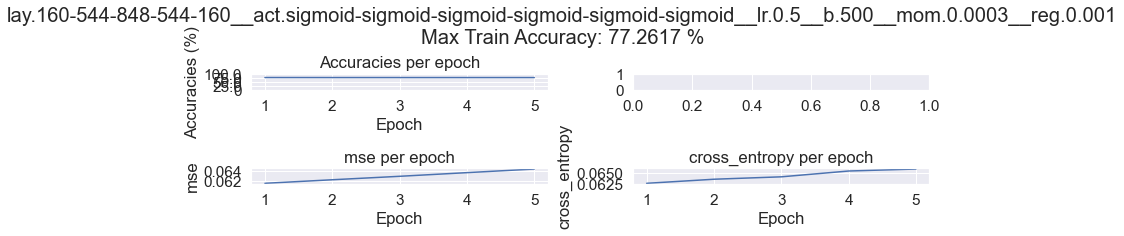

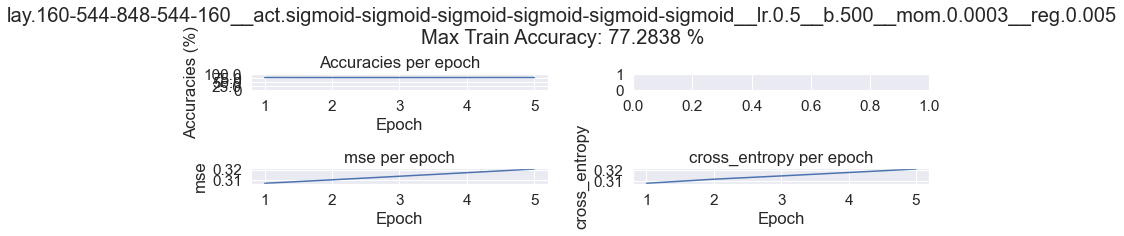

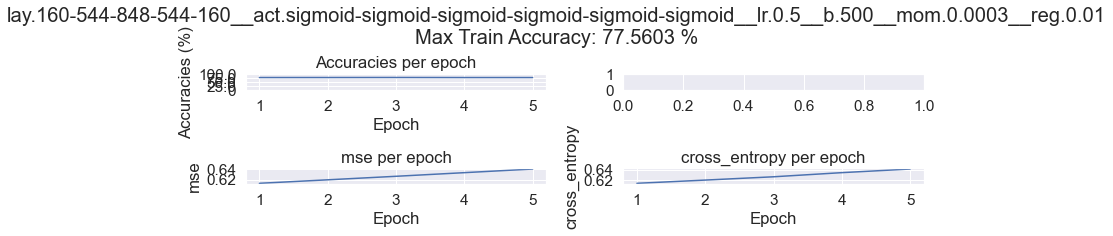

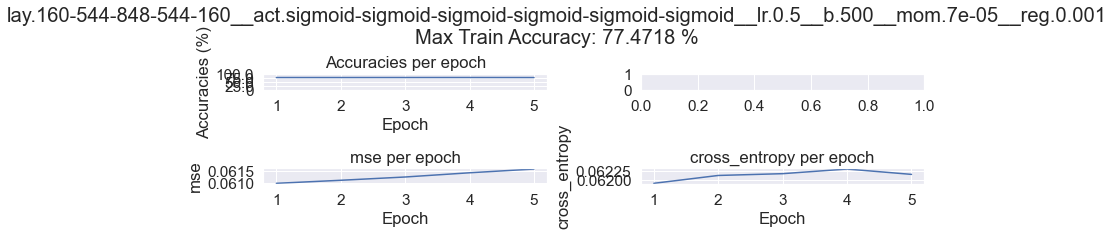

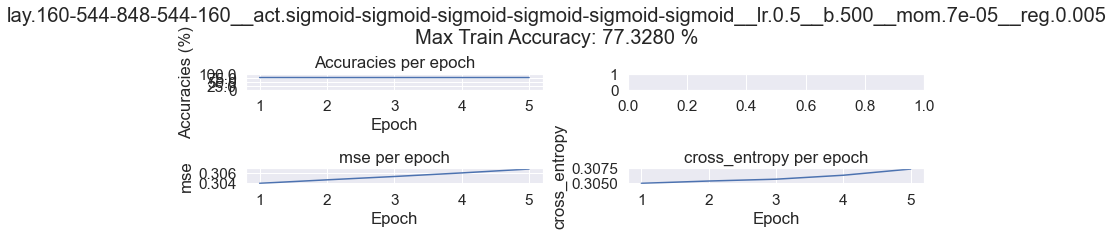

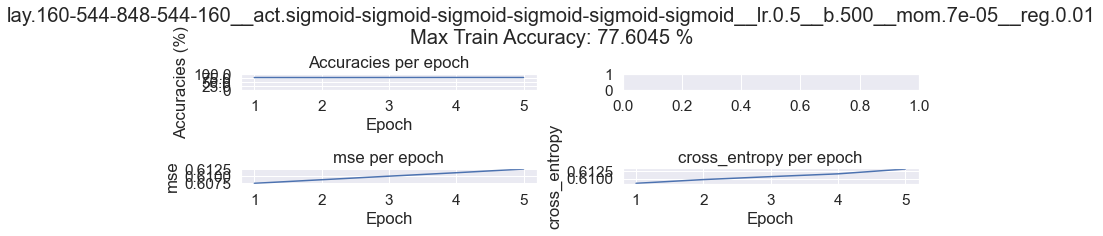

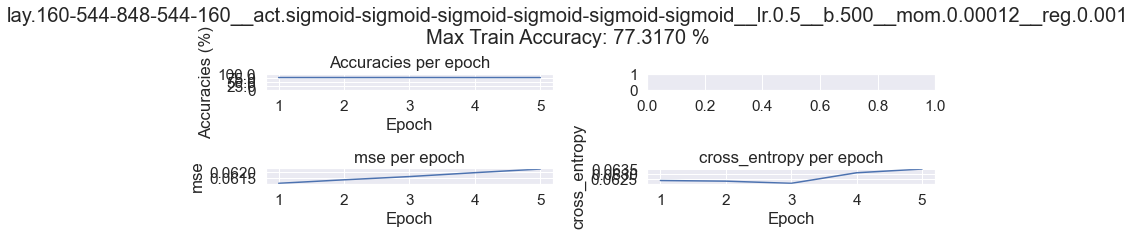

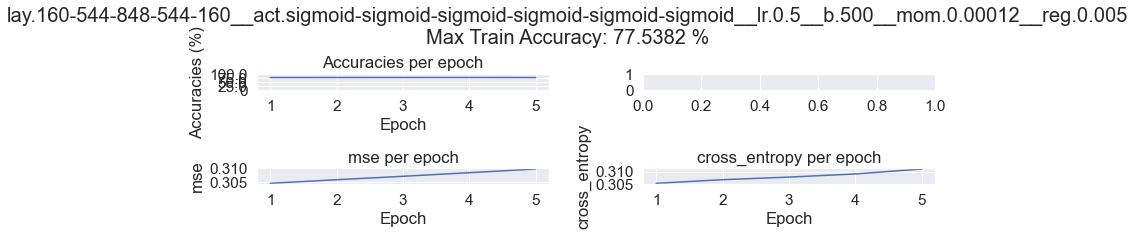

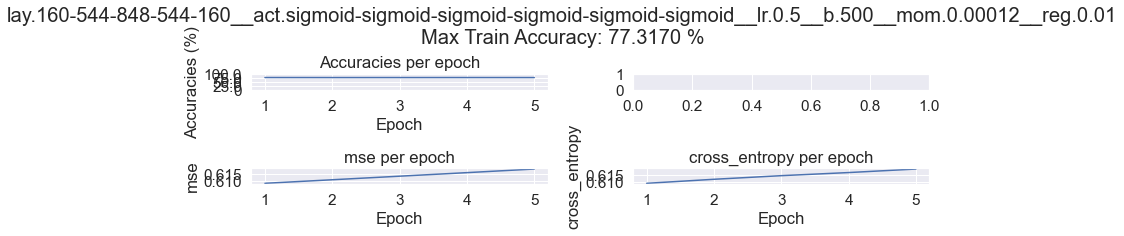

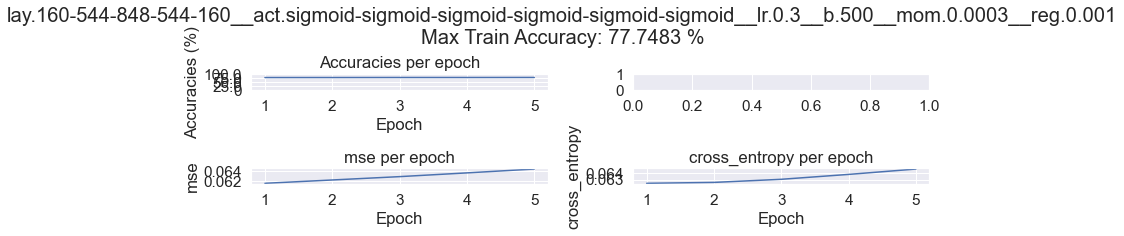

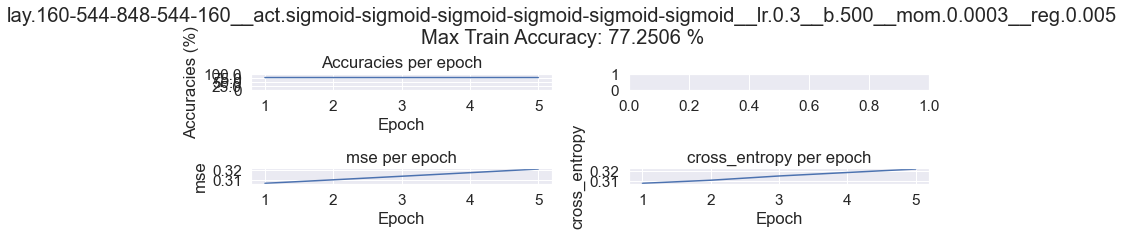

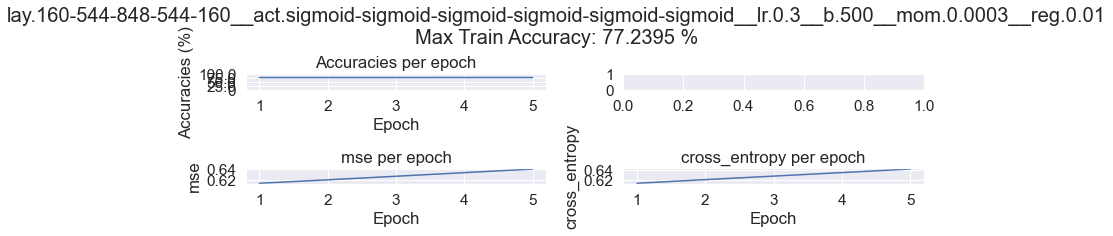

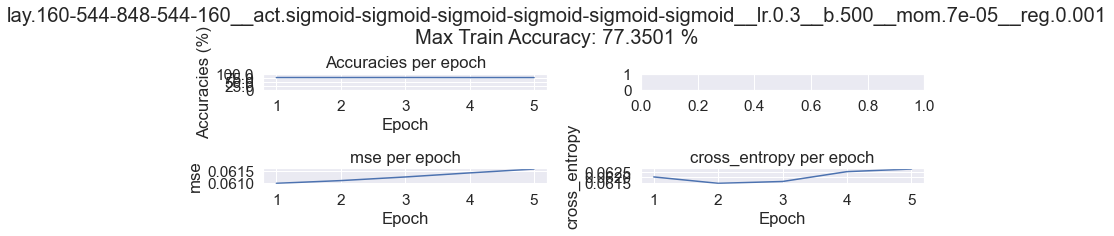

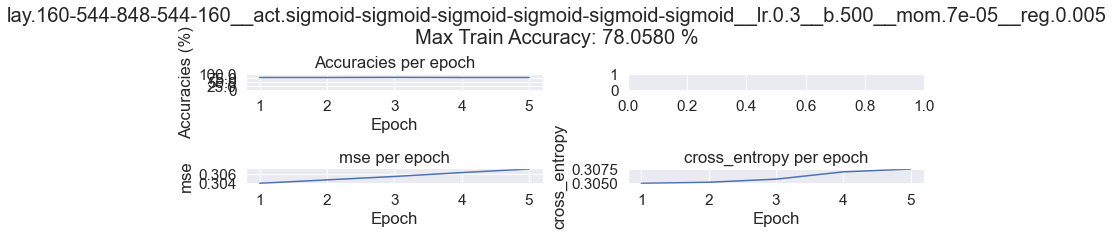

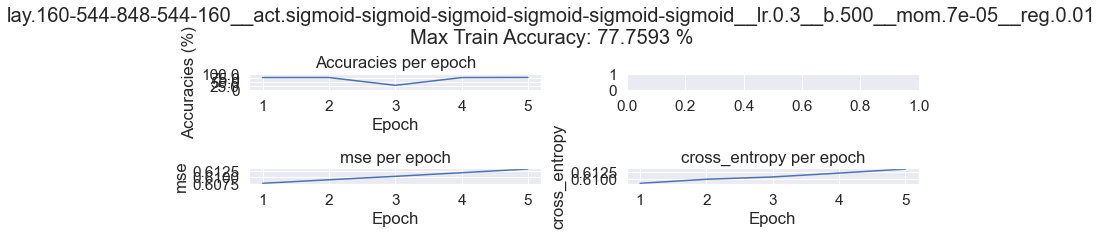

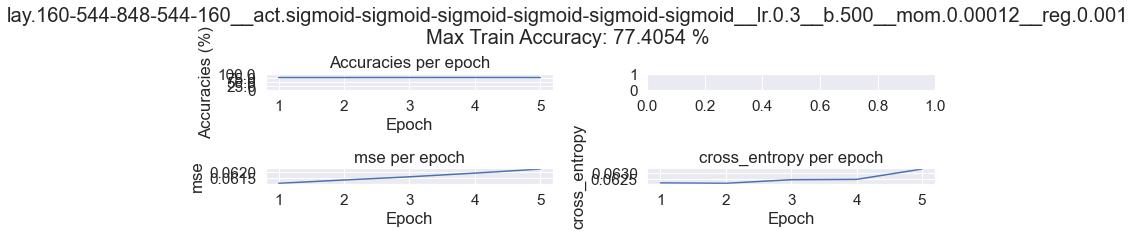

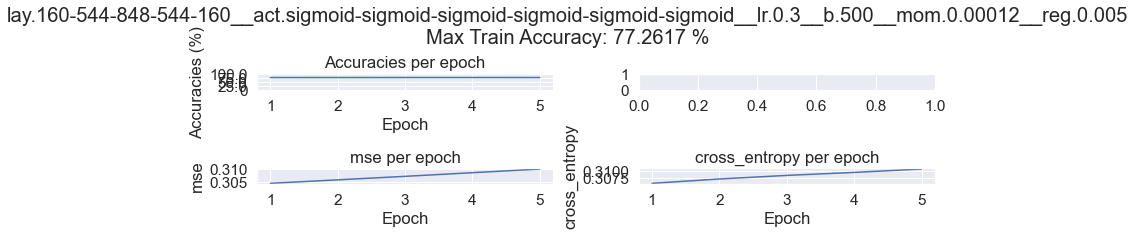

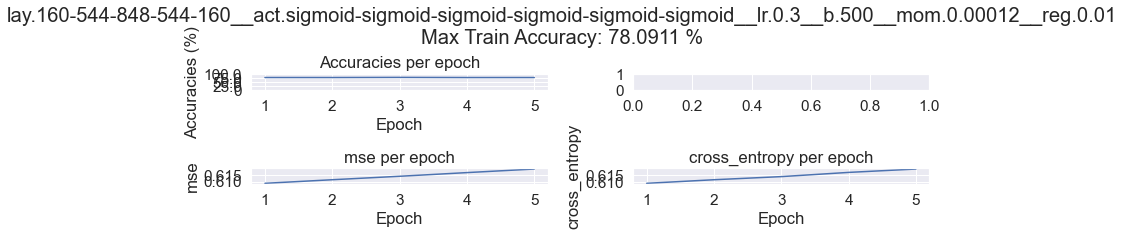

In [71]:
# for name in mlp_models_2: 
#   models.test_and_plot(title=name, 
#                        accuracies=mlp_accuracies_2[name], 
#                        losses=mlp_losses_2[name], 
#                        times=mlp_times_2[name], subsample=1)
for name in mlp_losses_new: 
  models.test_and_plot(title=name, 
                       accuracies=mlp_accuracies[name], 
                       losses=mlp_losses[name], subsample=1)

### 5a. Tune Logistic Regression
#### SKLearn Version

In [ ]:
# This creates a random grid of the most common parameters to test against.

random_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'dual': [True, False],
               'fit_intercept': [True, False],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               }


start_LR_tune = time()

LR_skl = LogisticRegression(max_iter=500)
LR_random = RandomizedSearchCV(estimator = LR_skl,
                               param_distributions = random_grid, 
                               n_iter = 75, cv = 5, 
                               verbose=2, random_state=44, 
                               n_jobs = -1)

# I combined the training and validation data because the RandomizedSearchCV
# uses cross validation to determine optimal parameters. 

LR_random.fit(pd.concat([X_train_PCA.iloc[:,0:-1], X_val_PCA.iloc[:,0:-1]]), 
              pd.concat([y_train, y_val]))

stop_LR_tune = time()

# Many of the parameter combination won't work but that is expected:

print('Best parameters out of 375 fits: ', '\n\n', LR_random.best_params_,
      'Cross validation took: ', stop_LR_tune - start_LR_tune, 'ms')

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best parameters out of 375 fits:  

 {'solver': 'lbfgs', 'penalty': 'none', 'fit_intercept': True, 'dual': False} Cross validation took:  73.88020300865173 ms


### 5b. Tune Logistic Regression
#### Scratch Version

In [ ]:
warnings.filterwarnings('ignore')
# The warning are because exp() is blowing up but since
# we're dividing by exp() it becomes ~0 which is what we want

thresh = np.linspace(0.05, 0.95, 10)
Lrate = np.linspace(0.05, 0.5, 10)
results, params = [], []

start_LR_scratch_tune = time()

for th in thresh:
    for lr in Lrate:
        LR_model = Log_Reg(learning_rate=lr, iters=500)
        LR_model.fit(X_train_PCA.iloc[:,0:-1], y_train)
        preds = LR_model.predict(X_val_PCA.iloc[:,0:-1], threshold=th)
        LR_model.F1_score_func(y_val, preds)
        results.append(LR_model.F1_Score)
        params.append([th, lr])

stop_LR_scratch_tune = time()
time_LR_scratch_tune = stop_LR_scratch_tune - start_LR_scratch_tune

opt_n = results.index(max(results))
print('The optimal threshold and learning rate: ', params[opt_n],
      '\n', 'The highest F1 Score: ',
      results[opt_n], 'Tuning Logistic Regression Scratch took: ', time_LR_scratch_tune, 's')

opt_params = params[opt_n]

The optimal threshold and learning rate:  [0.15, 0.1] 
 The highest F1 Score:  0.5590778097982709 Tuning Logistic Regression Scratch took:  139.34579253196716 s


## Training

### 1. Train KMeans

In [ ]:
start_time = time()
km = models.kmeans(X_train_PCA_TVT, dist='cosine')
km.fit()
train_time = time() - start_time


print("======================================")
print(f"\033[1m1. Kmeans Train Results \033[0m")
print("======================================")
print(f"Training size {X_train_PCA_TVT.shape[0]}")
print(f"Kmeans training time {train_time} secs")
y_pred = km.predict(X_train_PCA_TVT, y_train)
models.kmeans.classification_report(y_train, y_pred)

print(" ")
print("======================================")
print(f"\033[1m2. Kmeans Validation Results \033[0m")
print("======================================")
print(f"Validation size {X_val_PCA_TVT.shape[0]}")
y_pred = km.predict(X_val_PCA_TVT, y_val)
models.kmeans.classification_report(y_val, y_pred)
km.plot_membership_switches()

### 2. Train SVM

In [ ]:
start_time = time()
clf = models.SVC(C=1000, kernel='rbf', gamma=0.001)
clf.fit(X_train_PCA_TVT, y_train)
train_time = time() - start_time

print("======================================")
print(f"\033[1m1. SVM Train Results \033[0m")
print("======================================")
print(f"Training size {X_train_PCA_TVT.shape[0]}")
print(f"SVM training time {train_time} secs")
y_pred = clf.predict(X_train_PCA_TVT)
models.kmeans.classification_report(y_train, y_pred)

print(" ")
print("======================================")
print(f"\033[1m2. SVM Validation Results \033[0m")
print("======================================")
y_pred = clf.predict(X_val_PCA_TVT)
models.kmeans.classification_report(y_val, y_pred)

 ### 3. Train Bayesian

In [ ]:
# Set parameters
bayesian_case_tr = models.BayesianCase(train_x=X_train_PCA_TVT_np, train_y=y_train_np, 
                                        test_x=X_test_PCA_TVT_np, test_y=y_test_np)
bayesian_case_tr.fit()

### 5a. Train Logistic Regression 
##### SKLearn Version

In [ ]:
start_train_LR = time()
LR_skl = LogisticRegression(max_iter=500, dual = False, fit_intercept = True, 
              penalty = 'none', solver = 'lbfgs')

LR_skl.fit(X_train_PCA.iloc[:,0:-1], y_train)
stop_train_LR = time()

train_time_LR_skl = stop_train_LR - start_train_LR

### 5b. Train Logistic Regression 
##### Scratch Version

In [ ]:
start_train_LR_scratch = time()

LR_scratch = Log_Reg(learning_rate=opt_params[1], iters=500) #opt_params[1]
LR_scratch.fit(X_train_PCA, y_train)

stop_train_LR_scratch = time()

time_train_LR_scratch = stop_train_LR_scratch - start_train_LR_scratch

print('The optimal bias: ', LR_scratch.bias, '\n\n', 'The optimal weights: ', LR_scratch.weights,
     '\n\n', 'Training Log Reg Scratch took: ', time_train_LR_scratch, 's')

The optimal bias:  0.25879289515779547 

 The optimal weights:  [-8.82322788e+00 -1.69637941e+01  4.49523369e-01 -3.51379640e+00
  2.93322391e+00 -8.17122630e-01 -9.17814143e-01 -2.18827731e+00
  1.07171325e+00 -4.12223640e+00 -8.55086336e-01  4.93982728e+00
  1.68368898e-01  1.11355954e+00  2.29519713e+00  9.61520292e-04] 

 Training Log Reg Scratch took:  0.8028581142425537 s


## Testing

### 1. Test KMeans

In [ ]:
# Prepare Test Data
X_test_PCA_TVT = X_test_PCA.loc[:, X_test_PCA.columns!='PCA_15'].copy()
X_test_PCA_TVT.reset_index(drop=True)
X_test_PCA_TVT = X_test_PCA_TVT.to_numpy()

print("======================================")
print(f"\033[1m1. Kmeans Test Results \033[0m")
print("======================================")
start_time = time()
y_pred = km.predict(X_test_PCA_TVT, y_test)
test_time = time() - start_time
print(f"Test data size {X_test_PCA_TVT.shape[0]}")
print(f"Kmeans prediction time {test_time} secs")
models.kmeans.classification_report(y_test, y_pred)

print("")
## Compare results from SKLearn's Kmeans
print("======================================")
print(f"\033[1m2. Sklearn Kmeans Test Results \033[0m")
print("======================================")
sk_km = models.KMeans(n_clusters=2, random_state=0).fit(X_train_PCA_TVT)
y_pred = sk_km.predict(X_test_PCA_TVT)
models.kmeans.classification_report(y_test, y_pred)

### 2. Test SVM

In [ ]:
print("======================================")
print(f"\033[1mSVM Test Results \033[0m")
print("======================================")
start_time = time()
y_pred = clf.predict(X_test_PCA_TVT)
test_time = time() - start_time
print(f"Test data size {X_test_PCA_TVT.shape[0]}")
print(f"SVM prediction time {test_time} secs")
models.kmeans.classification_report(y_test, y_pred)

### 3. Test Bayesian

In [ ]:
### -- Case 1 -- ###
bay_case = 'euclidean'
bay_priors = (0.9848 , 0.0152)
bayesian_case_tr.predict(mtype=bay_case, priors=bay_priors)
# Retrieve statisics
accuracy, classwise_accuracy, prediction_time = bayesian_case_tr.get_statistics(bay_case)
tp, fn, fp, tn = bayesian_case_tr.get_confusion_matrix(bay_case)
bay_results = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
bayesian_case_tr.print_statistics(name="Case 1", mtype=bay_case)
### -- Case 2 -- ###
bay_case = 'mahalanobis'
bay_priors = (0.7558 , 0.2442)
bayesian_case_tr.predict(mtype=bay_case, priors=bay_priors)
# Retrieve statisics
accuracy, classwise_accuracy, prediction_time = bayesian_case_tr.get_statistics(bay_case)
tp, fn, fp, tn = bayesian_case_tr.get_confusion_matrix(bay_case)
bay_results = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
bayesian_case_tr.print_statistics(name="Case 2", mtype=bay_case)
### -- Case 3 -- ###
bay_case = 'quadratic'
bay_priors = (0.9924 , 0.0076)
bayesian_case_tr.predict(mtype=bay_case, priors=bay_priors)
# Retrieve statisics
accuracy, classwise_accuracy, prediction_time = bayesian_case_tr.get_statistics(bay_case)
tp, fn, fp, tn = bayesian_case_tr.get_confusion_matrix(bay_case)
bay_results = (accuracy, classwise_accuracy, prediction_time, tp, fn, fp, tn)
bayesian_case_tr.print_statistics(name="Case 3", mtype=bay_case)


### 5a. Test Logistic Regression
#### SKLearn Version

In [ ]:
start_test_LR_skl = time()
preds_LR_skl = LR_skl.predict(X_test_PCA.iloc[:,0:-1])
stop_test_LR_skl = time()

time_test_LR_skl = stop_test_LR_skl - start_test_LR_skl
cm_LR_sk = confusion_matrix(y_test, preds_LR_skl)

models.evaluate_cm(cm_LR_sk, 'PRINT')            

accuracy:  0.8076965608758155 precision:  0.6487676056338029 sensitivity:  0.3548387096774194 specificity:  0.9427217915590008 f1_score:  0.45876128229069413


### 5b. Test Logistic Regression 
##### Scratch Version

In [ ]:
start_LR_test_scratch = time()

preds_LR_scratch = LR_scratch.predict(X_train_PCA, threshold=params[opt_n][0]) #params[opt_n][0]

stop_LR_test_scratch = time()

time_LR_test_scratch = stop_LR_test_scratch - start_LR_test_scratch

cm_LR_scratch = confusion_matrix(y_train, preds_LR_scratch)
models.evaluate_cm(cm_LR_scratch, 'PRINT')            

accuracy:  0.7708471577084716 precision:  0.545 sensitivity:  0.013123043582952083 specificity:  0.9967339028066902 f1_score:  0.025628967787444154


## Evaluation

### 5a. Evaluate Logistic Regression
#### SKLearn Version

### 5b. Evaluate Logistic Regression 
##### Scratch Version

## Plots

In [ ]:
from project_libs.project import plotter as pl